# step 1.import dependencies

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
#from utility import check_missing_value

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# step 2.data import

In [48]:
df = pd.read_csv('DATA/Advertising.csv',index_col=0)
df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


# step 3.Data Analysis

In [49]:
print(df.dtypes)
print(df.shape)
print(df.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


# step 4.check assupmtion

## ASSUMPTION 1.There should be no outilers in the data

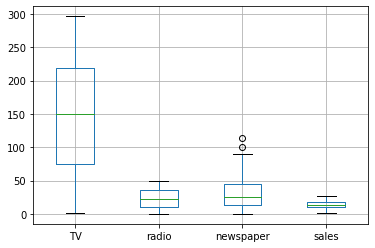

In [50]:
df.boxplot(grid=True) #we only use boxplot for continuos numeric data

in data frame we have all the variables i cuntunious numeric values so we crate box plot on all columns by this plot we can see 
there is no outliers in tv, radio, sales but there are outliers in newspaper


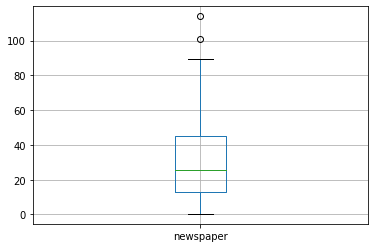

In [51]:
df.boxplot(column='newspaper')

#### Note: If outlier Present then we can treat using below approch
1.Elimination


a.Directly droping the variable

2.Treat the outlier

a.using Caping and Floaring Approch

b.Replace Using Measure of Central Tendencies

c.replace custom values

3.If cluster is present then leave them as it is

4.Check with client if this is acceptable range or not

In [52]:
def check_missing_values(data):
    """
    objective : check missing values vslue count and percentage in all colums.
    data:
    input data frame
    return: missing values data frame
    
    
    """
    total=data.isnull().sum().sort_values(ascending=False)
    percent=(data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=["total","Percent"])
    return missing_data

In [53]:
miss = check_missing_values(df)
miss

,total,Percent
sales,0,0.0
newspaper,0,0.0
radio,0,0.0
TV,0,0.0


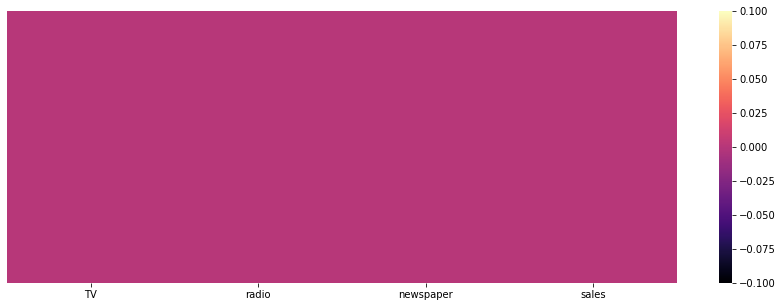

In [54]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap="magma")

Note:

1. If Missing value contain more than 50% of the data then you can drop the entire column

2. if less than 50% then we can treat those missing values by using Measure of Central tendencies

3. If column is Categorial then you can use Mode to replace missing values 

4. If column is Continuous Numerical Variable then you can you use mean if that variable is set

5. if column is continuous numerical variable with skewd data then we can use Median as which is affected by outlier

6. You can Predict the missing values by using Other featuers (not recommended)

7. You can directly ask to client

8. Common Sense

# Assumpiton 2 : linerity : every indepent varaiable should have a linear reletionship with Dependent variable 

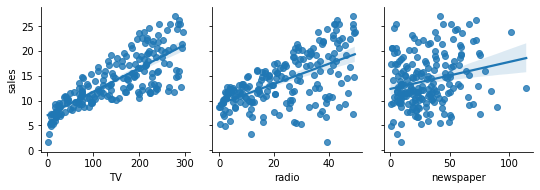

In [55]:
sns.pairplot(df,
             x_vars=["TV","radio","newspaper"],
             y_vars="sales",
             kind='reg')

plt.show()

Note: If the assumption of Linearity is not met then we can drop that variable

- Strong Positive Linear Relationship in Tv and sales

- Moderately Strong Positive Linear Relationship in Radio and sales 

- NO Relation in Newspaper Sales also the C.I is also high

In [56]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [57]:
feature_cols =['TV','radio','newspaper']
X = df[feature_cols]
y= df.sales

In [58]:
X.head(5)

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [59]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

# assumption 3: noramlity : The dependent variable should follow an apporopriate normal distribution

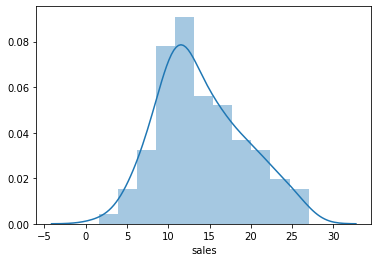

In [60]:
sns.distplot(y,hist=True)
plt.show()

- sale variable is meeting the assupmtion and we can see the appropriate normal Distribution

# Note : IF its normal or if its skewed plot then we can transform th ecolumn in different transformation 

1.log transform 
   - most of the line WE prefer log transform,because it will help you to smoothing of curve 

2.SQRTtranform 
   - in sqrt tranform we can see the peeks and sometiome it will not help to smoothing of curve

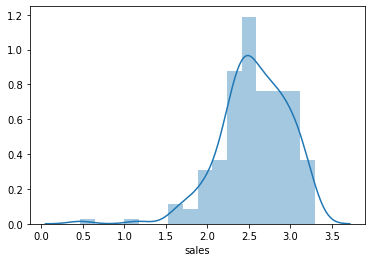

In [61]:
#####you can use this code to convert into Log transformation

Y_log= np.log(y) 
sns.distplot(Y_log, hist=True)

#####Note: If your data is approximate normal then dont transform cat you will get skewd data

- Note: For good practive make sure that your X variables does not contain high skewness and if its APPROPROXIMATE NORMAL THEN IITS GOOD

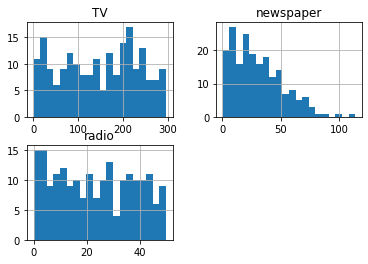

In [62]:
#check hist for all variables

X.hist(bins=20)

plt.show()

In [63]:
data_num_skew= X.apply(lambda x: skew(x.dropna())) 
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew <-0.75)]

print(data_num_skew)

print(data_num_skewed)

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [64]:

#apply Log + 1 transformation for all numeric featreus with Skewness over 0.75

X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

- Range of skewness is -1 to +1 and value close to 0 means normal distribution

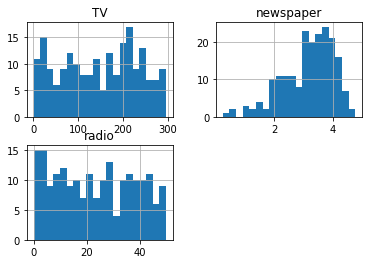

In [65]:
# check hist for all variables after log transform of newsmaner
X.hist(bins=20)
plt.show()

note: types of models
log - tramsform 
level - og

x    y

log - log
log - level
level - log
level - level

# Assumption 4 : THere should be no multicolinearity in the data

- Multicolinearity is problem where one variable is dependent on other, we want dependecy between x and y variable but not in the X vases to X variables are depend on each other then the model will not be good.

- To check the multicolinearity we can use the pearson correlation or VIF value


In [66]:
corr_df=X.corr(method="pearson")
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


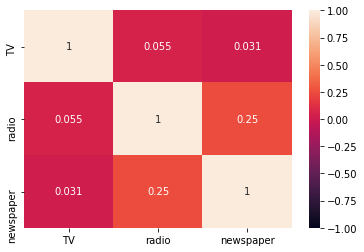

In [67]:
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

- We want value close to 0 means that is not correlated with each other

## Note: If the correlation is high between two variables then drop one beacuse both the varible carrying the similar information so eliminate the variable but think logically.

## check VIF

- SOMETIMES the correlation matrix alone will not help you to check the multycolinearity so you can use vif

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"]= X.columns
vif_df["VIF FACTOR"]=[vif(X.values,i) for i in range (X.shape[1])]
vif_df.round()

,features,VIF FACTOR
0,TV,3.0
1,radio,4.0
2,newspaper,5.0


less than 5 value is good in VIf Which represent no multicolinerity

## Note: Once you eliminate one variable based on VIF score then other variable's VF also change and it decrease so never elimnate all variables so Remove Variables with Highest value and then Run the function again. 
## Also use domain Knowledge Don't depend on VIF Values

In [69]:
# df.drop("newspaper", axis=1, inplace=True)

##Rerun the VIF CODE

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(X)

scaler.transform(X)

print(X)

        TV  radio  newspaper
1    230.1   37.8   4.251348
2     44.5   39.3   3.830813
3     17.2   45.9   4.252772
4    151.5   41.3   4.085976
5    180.8   10.8   4.084294
..     ...    ...        ...
196   38.2    3.7   2.694627
197   94.2    4.9   2.208274
198  177.0    9.3   2.001480
199  283.6   42.0   4.207673
200  232.1    8.6   2.272126

[200 rows x 3 columns]


## spliting train and test data

In [70]:
from sklearn.model_selection import train_test_split
# >1000 --> test size =0.3
# <1000 --> test size =0.3

# split the data inot test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [72]:
# df.drop("newspaper", axis=1, inplace=True)

##Rerun the VIF CODE

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)`
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train_scale
X_test_scale

array([[ 0.70680807,  0.59229209,  0.46173972],
       [ 0.01573726,  0.98580122,  0.90759788],
       [ 0.73315087,  0.55578093,  0.83300465],
       [ 0.95620937,  0.84584178,  0.88014484],
       [ 0.72630859,  0.83975659,  0.76773044],
       [ 0.48990763,  0.47870183,  0.61088993],
       [ 0.63051659,  0.36105477,  0.67339682],
       [ 0.66643859,  0.9959432 ,  0.85855021],
       [ 0.72767704,  0.88438134,  0.68642747],
       [ 0.04481697,  0.92494929,  0.89020572],
       [ 0.97707834,  0.85192698,  0.82379528],
       [ 0.21211085,  0.11156187,  0.66133516],
       [ 0.04379063,  0.88032454,  0.94630581],
       [ 0.74033527,  0.6673428 ,  0.75818818],
       [ 0.77112556,  0.64908722,  0.90523715],
       [ 0.33732467,  0.59432049,  0.44134199],
       [ 0.85973315,  0.53955375,  0.35904374],
       [ 0.00444749,  0.60040568,  0.46389516],
       [ 0.8128635 ,  0.76470588,  0.65230209],
       [ 0.68730756,  0.90872211,  0.61637144],
       [ 0.62846391,  0.42190669,  0.466

In [73]:
# df.drop("newspaper", axis=1, inplace=True)

##Rerun the VIF CODE

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)
X_train_scale
X_test_scale

array([[ 0.80575711,  0.50667623, -0.89144395],
       [-1.67640209,  1.85065419,  1.35278015],
       [ 0.90037407,  0.38197724,  0.97731565],
       [ 1.70154624,  1.37264141,  1.21459548],
       [ 0.87579823,  1.35185824,  0.64875833],
       [ 0.02670318,  0.11872383, -0.14069737],
       [ 0.53173656, -0.28308402,  0.17393068],
       [ 0.66075969,  1.8852928 ,  1.10589906],
       [ 0.8807134 ,  1.50426812,  0.23952036],
       [-1.5719548 ,  1.64282255,  1.26523682],
       [ 1.77650254,  1.39342457,  0.93096031],
       [-0.97107567, -1.13519376,  0.11321838],
       [-1.57564117,  1.49041267,  1.54761627],
       [ 0.92617869,  0.76300192,  0.60072744],
       [ 1.03676994,  0.70065243,  1.34089746],
       [-0.52133791,  0.51360395, -0.99411578],
       [ 1.35502699,  0.32655547, -1.40836351],
       [-1.71695222,  0.53438711, -0.88059455],
       [ 1.18668253,  1.09553255,  0.06775047],
       [ 0.73571598,  1.58740077, -0.1131062 ],
       [ 0.52436381, -0.07525237, -0.869

In [74]:
from sklearn.linear_model import LinearRegression
#creta a model object
lm= LinearRegression()
#train a model obj
lm.fit(X_train_scale,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

13.83125
[ 3.55979799  2.786444   -0.04359355]


In [76]:
# pair the feature names with the coefficients
print(list(zip(feature_cols,lm.coef_)))

[('TV', 3.5597979869430008), ('radio', 2.7864440042405145), ('newspaper', -0.0435935466753325)]


In [77]:
X1=400

X2=100

X3=20

Pred=14.121761102061924+(3.7468786844688385 *X1)+(2.858810735092422 *X2)+(-0.04231058737056026 *X3)

print(Pred)

1797.9080966514284


In [78]:
Y_pred=lm.predict(X_test_scale)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [79]:
new_df = pd.DataFrame()
new_df = X_test
new_df["Actual Sales"] = y_test
new_df["Predicted Sales"] = Y_pred
new_df


,TV,radio,newspaper,Actual Sales,Predicted Sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


R-Square: tells you how much variablity you can explain in the data with help of Regression euqation. 
you will get value in the range of 0 to 1, close to one means good model and close to 0 means worst
model (sometimes very rarely you will get the value less than 0 also)
it tell you how your regression model is doing in comparison with the mean model. 
eg if your score is 0.85 then your regression model is doing greater job rather than mean model.
and if you get a score less than 0 then your mean model is doing a better job than your regression model
so your regression model is incorrect and mean model is good. if you get accuracy less than 0.75 then try 
to tune the model to get imporved accuracy.

IMP NOTE: In every elgorithm we have multiple parameter and dedicated approch for model tunning but 
whenit comes to regression then feature selection is the best technique to tune the model, 
so for eg. if your model has 12 variables then you can elemenate few varaiables based on P value or 
significance value and dont just rely on p value 
maybe you can eliminate few imp variables so be carefull when you are doing featrue engineering.

Adjusted R-square:
In industry we tell adjusted R square not actual R squre. bcoz its adjusted so it does the same job
there is major difference between this two. so if you add more and more variables and data points
for training data then evenif they are not relevent still your R square value will increase but
adjusted R square will not increase in few case it will decrese, so if you add relevent data or
varibles then only your adjusted R square will increase, so thats why adjusted R square has its own
reputation when interpreting the linear Regressioin model, so adjusted R square consdered as better
matrix bcoz it will work only significant variables.

RMSE (Root Mean square error )
RMSE value should be low as possible and we have to compare this value with Y value so this value should be close to Y Min then model is doing a good job but if this value is close to Y_Max the model is not performing well, there is no range for RMSE Value.

if i am trying to generate multiple model then 1 will calculate RMSE, and in industry perspective 1 will use RMSE to compare all the models to identify the best model. eg. if i trained 3 models and all the models have Same Rsqure and adjusted r square then weill compare RMSE for all three models, and models with minmum rase is the best models, so basically rmse value is used to compare diff models on same data.

AIC and BIC

WE use RMSE when we are using different models for comparison, but when we use different data and same model then we use ATC (Akaike information Criteri) eg. if we use 12 var for LR1 MODEL and 9 var for 1r2 model and 8 var for 1r3 model so in this case we have different data but same model so we will use AIC Score, this should minimum values and min bic then better the model

In [80]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(y_test,Y_pred)
print("R square:", r2)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square:",adjusted_r_squared)

rmse = np.sqrt(mean_squared_error(y_test,Y_pred))
print("RMSE:",rmse)

R square: 0.834801071903532
Adjusted R Square: 0.8322725168816474
RMSE: 2.59297691109306


Rsquare tells you how much variablity you can wxplain in the data with the help of regression equation,
you will get value inthe range of 0 to 1 means good model and close to 0 means worst model (sometimes
you will get value less than 1 also)

In [81]:
print(min(y))

1.6


In [82]:
print(max(y))

27.0


In [83]:
new_df["Deviation"]=new_df["Actual Sales"]- new_df["Predicted Sales"]
new_df.to_excel("Advertising_pred.xlsx", header=True,index=True)
new_df.head(10)

,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490
20,147.3,23.9,3.000720,14.6,14.263259,0.336741
163,188.4,18.1,3.280911,14.9,14.927745,-0.027745
56,198.9,49.4,4.110874,23.7,21.388474,2.311526
70,216.8,43.9,3.339322,22.3,21.147529,1.152471
3,17.2,45.9,4.252772,9.3,12.757885,-3.457885


Regularization:

Penalty that we implement on model if they contain any insignificant variable or if there predicting wrong values, so we penalize the model to start performing better

So we have to types of penalty. Lasso and Ridge

Ridge: this is L2 Regression, it reduces the Beta values such that the overall impact of the insignificant variables over the model reduces.

Lasso: This is L1 Regression, it forces beta values of insignificant variables as zero, such that their impact is eliminated

### RIDGE REGRESSION

In [84]:
from sklearn.linear_model import Ridge

lm_ridge=Ridge()
lm_ridge.fit(X_train_scale,y_train)
#print intercept and coeffiecents for ridge regression

print(lm_ridge.intercept_)
print(lm_ridge.coef_)

13.83125
[ 3.53850454  2.76949688 -0.03872614]


In [85]:
#with alpha change the ridge model
from sklearn.linear_model import Ridge

lm_ridge=Ridge(alpha=0.5)
lm_ridge.fit(X_train_scale,y_train)
#print intercept and coeffiecents for ridge regression

print(lm_ridge.intercept_)
print(lm_ridge.coef_)

13.83125
[ 3.54911904  2.77794305 -0.04114493]


In [86]:
print(list(zip(feature_cols,lm.coef_)))

[('TV', 3.5597979869430008), ('radio', 2.7864440042405145), ('newspaper', -0.0435935466753325)]


In [87]:
print(list(zip(feature_cols,lm_ridge.coef_)))

[('TV', 3.5491190413800897), ('radio', 2.777943045450038), ('newspaper', -0.04114492805041528)]


In [88]:
Y_pred_ridge=lm_ridge.predict(X_test_scale)
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(y_test,Y_pred_ridge)
print("R square:", r2)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square:",adjusted_r_squared)

rmse = np.sqrt(mean_squared_error(y_test,Y_pred_ridge))
print("RMSE:",rmse)

R square: 0.8344995268129265
Adjusted R Square: 0.8319663563049611
RMSE: 2.5953423712771806


In [89]:
#with alpha change the lasso model
from sklearn.linear_model import Lasso

lm_lasso=Lasso(alpha=0.2)
lm_lasso.fit(X_train_scale,y_train)
#print intercept and coeffiecents for ridge regression

print(lm_lasso.intercept_)
print(lm_lasso.coef_)

13.83125
[3.37004213 2.58962728 0.        ]


In [90]:
print("Linear Reg:",list(zip(feature_cols,lm.coef_)))
print("Ridge Reg:",list(zip(feature_cols,lm_ridge.coef_)))
print("Lasso Reg:",list(zip(feature_cols,lm_lasso.coef_)))

Linear Reg: [('TV', 3.5597979869430008), ('radio', 2.7864440042405145), ('newspaper', -0.0435935466753325)]
Ridge Reg: [('TV', 3.5491190413800897), ('radio', 2.777943045450038), ('newspaper', -0.04114492805041528)]
Lasso Reg: [('TV', 3.3700421251750656), ('radio', 2.589627283245022), ('newspaper', 0.0)]


In [91]:
Y_pred_lasso=lm_lasso.predict(X_test_scale)
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(y_test,Y_pred_lasso)
print("R square:", r2) 

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square:",adjusted_r_squared)

rmse = np.sqrt(mean_squared_error(y_test,Y_pred_lasso))
print("RMSE:",rmse)

R square: 0.8277248930930312
Adjusted R Square: 0.8250880292118021
RMSE: 2.6479287876284454
